# Overview

Your task is to explore a dataset of crypto market data, analyse for trends and patterns, test for statistical relationships, and describe your findings. You will find an attachment with three csv files, including candlestick, open interest, and funding rate data.

# Requirements

The deliverables shall be as follows:

- Submit the code that were used in the analysis.
- Document your findings along with the code
- Highlight results of interest

The submission will be evaluated according to:

- Visualisations of the discoveries
- Quality of findings
- Clarity and structure of your communication

# Set-up

The module mplfinance is used for generating visualization in this notebook 

The code for generating visualizations has referenced to examples in the repo.

know more at https://github.com/matplotlib/mplfinance

In [1]:
!pip install --upgrade mplfinance

# Load the dataset

In [2]:
import pandas as pd

In [3]:
# helper function

# reads datetime
def convert_datetime(df):
    cols = ["datetime"]
    for col, data in df.iteritems():
        df[col] = pd.to_datetime(df[col], errors = 'coerce') if col in cols else df[col] # for out-of-bound datetimes -> NaT
    return df
            
def init_data(f):
    df = pd.read_csv(f)
    df = convert_datetime(df)
    df.set_index(df['datetime'], inplace=True)
    return df

In [4]:
candles = init_data("dataset/top5-candles-5min.csv")
interest = init_data("dataset/btc-open-interest.csv")
funding = init_data("dataset/all-funding-rate.csv")

In [5]:
# rename columns for easier manipulation

candles.rename(columns={"price_open":"Open", "price_close":"Close", "price_high":"High", "price_low":"Low", "volume":"Volume"}, inplace=True)

In [39]:
candles['binance-ETHUSDT-future']

,market,Open,Close,High,Low,vwap,Volume,candle_usd_volume,candle_trades_count,datetime
datetime,,,,,,,,,,
2021-06-01 00:00:00,binance-ETHUSDT-future,2706.45,2725.76,2732.20,2689.00,2711.493846,39616.634,1.073372e+08,38549,2021-06-01 00:00:00
2021-06-01 00:05:00,binance-ETHUSDT-future,2724.80,2729.26,2738.35,2719.57,2728.960539,20325.780,5.548375e+07,22466,2021-06-01 00:05:00
2021-06-01 00:10:00,binance-ETHUSDT-future,2729.09,2731.33,2741.45,2728.34,2733.741402,15173.379,4.149066e+07,16978,2021-06-01 00:10:00
2021-06-01 00:15:00,binance-ETHUSDT-future,2731.32,2714.79,2735.00,2714.78,2722.526249,14224.874,3.878311e+07,16527,2021-06-01 00:15:00
2021-06-01 00:20:00,binance-ETHUSDT-future,2714.79,2723.17,2726.49,2708.00,2718.598199,11159.576,3.034634e+07,14707,2021-06-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...
2021-08-31 23:35:00,binance-ETHUSDT-future,3434.06,3431.68,3440.00,3431.06,3436.588013,7048.083,2.421985e+07,9839,2021-08-31 23:35:00
2021-08-31 23:40:00,binance-ETHUSDT-future,3431.68,3435.06,3435.33,3424.20,3429.640069,9395.404,3.224049e+07,10197,2021-08-31 23:40:00
2021-08-31 23:45:00,binance-ETHUSDT-future,3434.99,3440.82,3442.41,3432.00,3437.909385,8823.915,3.032905e+07,9812,2021-08-31 23:45:00


In [6]:
print(candles.info())
print(candles.market.unique())
candles

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132480 entries, 2021-06-01 00:00:00 to 2021-08-31 23:55:00
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   market               132480 non-null  object        
 1   Open                 132480 non-null  float64       
 2   Close                132480 non-null  float64       
 3   High                 132480 non-null  float64       
 4   Low                  132480 non-null  float64       
 5   vwap                 132480 non-null  float64       
 6   Volume               132480 non-null  float64       
 7   candle_usd_volume    132480 non-null  float64       
 8   candle_trades_count  132480 non-null  int64         
 9   datetime             132480 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 11.1+ MB
None
['binance-ADAUSDT-future' 'binance-BNBUSDT-future'
 'binance-BTCUSDT-fut

,market,Open,Close,High,Low,vwap,Volume,candle_usd_volume,candle_trades_count,datetime
datetime,,,,,,,,,,
2021-06-01 00:00:00,binance-ADAUSDT-future,1.7369,1.7579,1.7596,1.7243,1.745112,10911603.0,1.901832e+07,19737,2021-06-01 00:00:00
2021-06-01 00:05:00,binance-ADAUSDT-future,1.7579,1.7565,1.7610,1.7496,1.756413,5233441.0,9.192430e+06,9538,2021-06-01 00:05:00
2021-06-01 00:10:00,binance-ADAUSDT-future,1.7563,1.7659,1.7696,1.7555,1.765150,3983706.0,7.030691e+06,9721,2021-06-01 00:10:00
2021-06-01 00:15:00,binance-ADAUSDT-future,1.7657,1.7586,1.7736,1.7582,1.766175,3956858.0,6.998680e+06,8700,2021-06-01 00:15:00
2021-06-01 00:20:00,binance-ADAUSDT-future,1.7585,1.7611,1.7634,1.7509,1.757195,3302787.0,5.809872e+06,7094,2021-06-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...
2021-08-31 23:35:00,binance-XRPUSDT-future,1.1845,1.1819,1.1849,1.1808,1.183065,2955184.1,3.494789e+06,4293,2021-08-31 23:35:00
2021-08-31 23:40:00,binance-XRPUSDT-future,1.1818,1.1936,1.1955,1.1806,1.188268,7949120.6,9.414325e+06,10203,2021-08-31 23:40:00
2021-08-31 23:45:00,binance-XRPUSDT-future,1.1937,1.1910,1.1951,1.1890,1.191987,4932346.3,5.879506e+06,5815,2021-08-31 23:45:00


In [7]:
# separate candles for each coin

candles = {coin:candles[candles.market==coin] for coin in candles.market.unique()}

In [8]:
print(interest.info())
print(interest.market.unique())
interest

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100589 entries, 2021-06-01 00:04:02 to 2021-08-31 23:55:00
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   market          100589 non-null  object        
 1   contract_count  100589 non-null  float64       
 2   value_usd       100589 non-null  float64       
 3   datetime        100589 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.8+ MB
None
['binance-BTCUSDT-future']


,market,contract_count,value_usd,datetime
datetime,,,,
2021-06-01 00:04:02,binance-BTCUSDT-future,37440.406,1.407207e+09,2021-06-01 00:04:02
2021-06-01 00:19:03,binance-BTCUSDT-future,37455.368,1.403861e+09,2021-06-01 00:19:03
2021-06-01 00:34:03,binance-BTCUSDT-future,37371.891,1.405557e+09,2021-06-01 00:34:03
2021-06-01 00:49:03,binance-BTCUSDT-future,37478.724,1.411198e+09,2021-06-01 00:49:03
2021-06-01 01:04:04,binance-BTCUSDT-future,37446.620,1.414282e+09,2021-06-01 01:04:04
...,...,...,...,...
2021-08-31 23:30:00,binance-BTCUSDT-future,60770.079,2.870823e+09,2021-08-31 23:30:00
2021-08-31 23:40:00,binance-BTCUSDT-future,60770.821,2.874152e+09,2021-08-31 23:40:00
2021-08-31 23:45:00,binance-BTCUSDT-future,60724.114,2.872043e+09,2021-08-31 23:45:00


In [9]:
print(funding.info())
print(funding.market.unique())
funding

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32182 entries, 2021-06-01 00:00:00 to 2021-08-31 16:00:00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    32182 non-null  object        
 1   datetime  32182 non-null  datetime64[ns]
 2   rate      32182 non-null  float64       
 3   period    32182 non-null  object        
 4   interval  32182 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.5+ MB
None
['binance-1000SHIBUSDT-future' 'binance-1INCHUSDT-future'
 'binance-AAVEUSDT-future' 'binance-ADAUSDT-future'
 'binance-AKROUSDT-future' 'binance-ALGOUSDT-future'
 'binance-ALICEUSDT-future' 'binance-ALPHAUSDT-future'
 'binance-ANKRUSDT-future' 'binance-ATOMUSDT-future'
 'binance-AVAXUSDT-future' 'binance-AXSUSDT-future'
 'binance-BAKEUSDT-future' 'binance-BALUSDT-future'
 'binance-BANDUSDT-future' 'binance-BATUSDT-future'
 'binance-BCHUSDT-future' 'binan

,market,datetime,rate,period,interval
datetime,,,,,
2021-06-01 00:00:00,binance-1000SHIBUSDT-future,2021-06-01 00:00:00,-0.002011,08:00:00,08:00:00
2021-06-01 08:00:00,binance-1000SHIBUSDT-future,2021-06-01 08:00:00,-0.001921,08:00:00,08:00:00
2021-06-01 16:00:00,binance-1000SHIBUSDT-future,2021-06-01 16:00:00,-0.000421,08:00:00,08:00:00
2021-06-02 00:00:00,binance-1000SHIBUSDT-future,2021-06-02 00:00:00,-0.000113,08:00:00,08:00:00
2021-06-02 08:00:00,binance-1000SHIBUSDT-future,2021-06-02 08:00:00,0.000217,08:00:00,08:00:00
...,...,...,...,...,...
2021-08-30 08:00:00,binance-ZRXUSDT-future,2021-08-30 08:00:00,0.000100,08:00:00,08:00:00
2021-08-30 16:00:00,binance-ZRXUSDT-future,2021-08-30 16:00:00,0.000100,08:00:00,08:00:00
2021-08-31 00:00:00,binance-ZRXUSDT-future,2021-08-31 00:00:00,0.000100,08:00:00,08:00:00


# Visualizations

In [10]:
import mplfinance as mpf

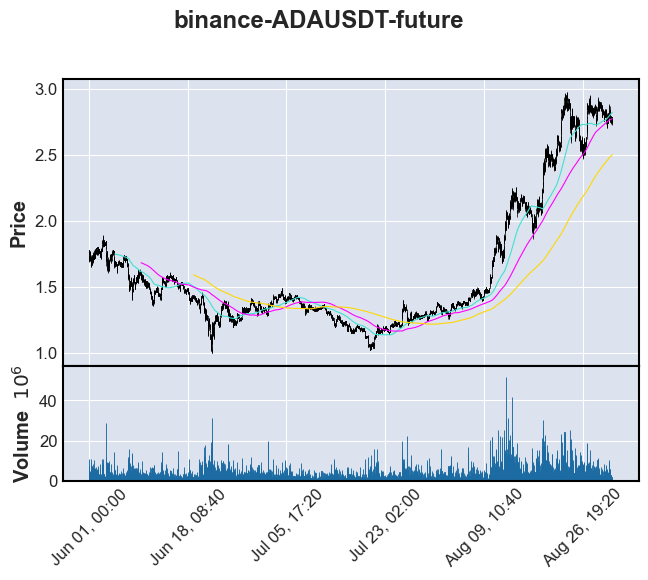

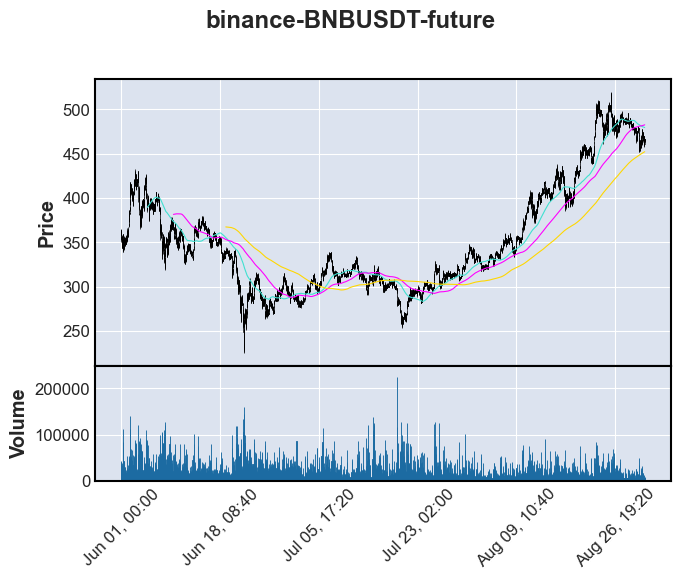

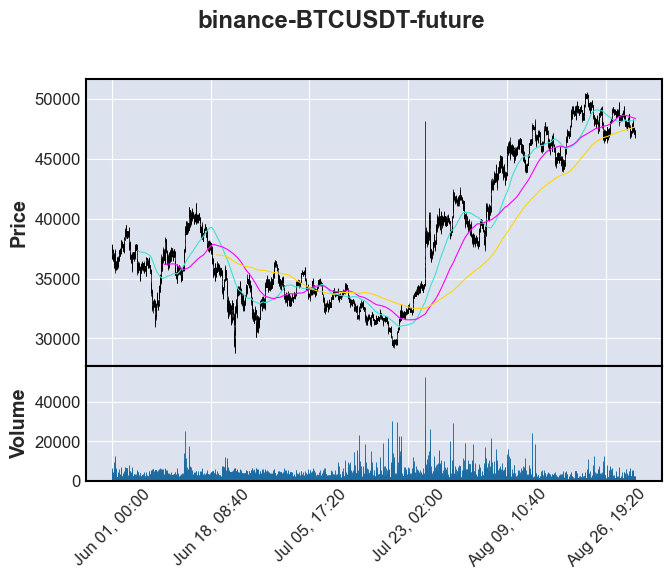

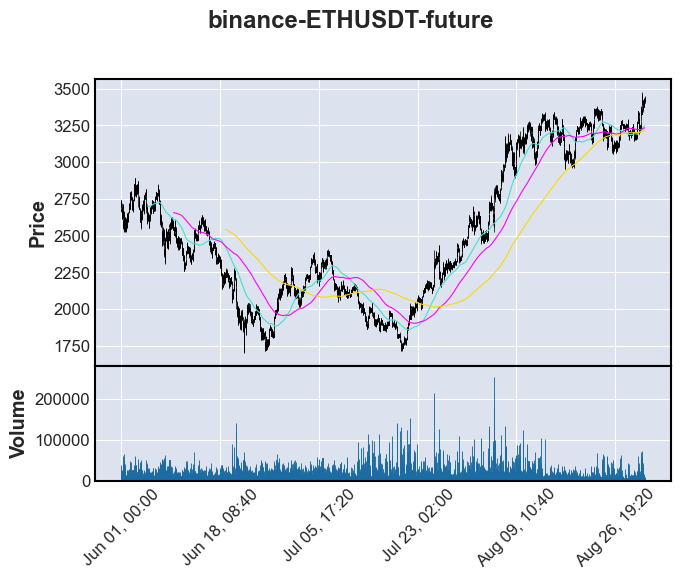

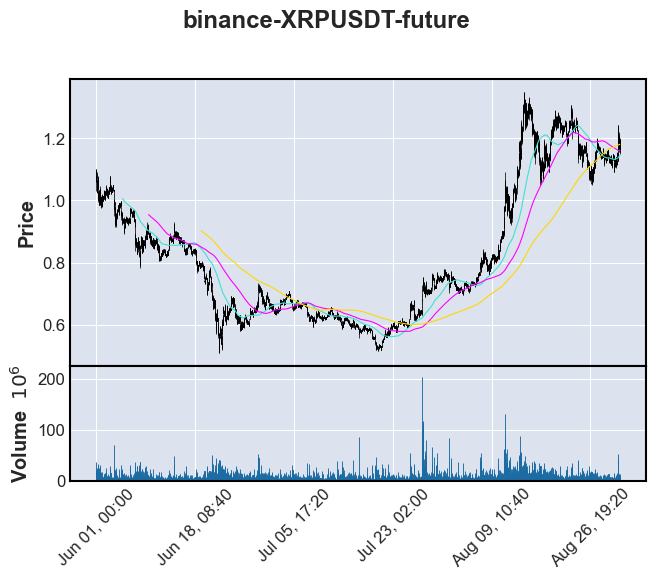

In [31]:
# All candlestick in the whole period

for key, value in candles.items():
    # print(key)
    # print(value.describe())
    num_datapoint = len(value)
    mpf.plot(value, volume=True,title=key,mav=(int(num_datapoint*0.05),int(num_datapoint*0.1),int(num_datapoint*0.2)),warn_too_much_data=32000)

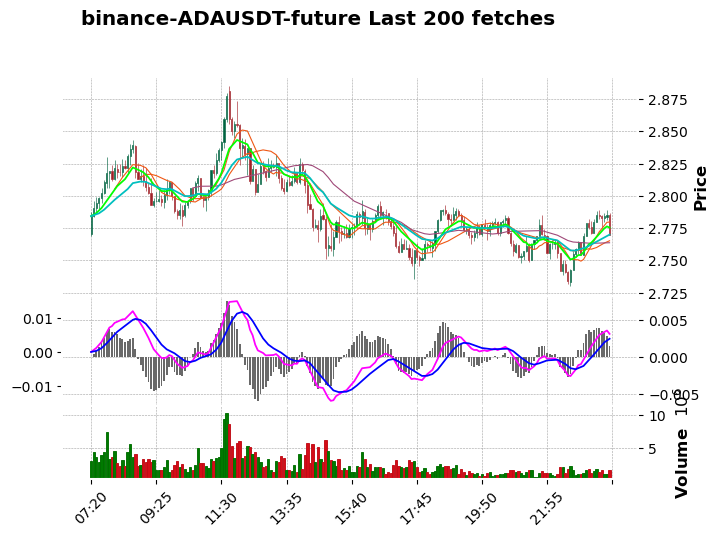

------------------------------------------------------------------------------------


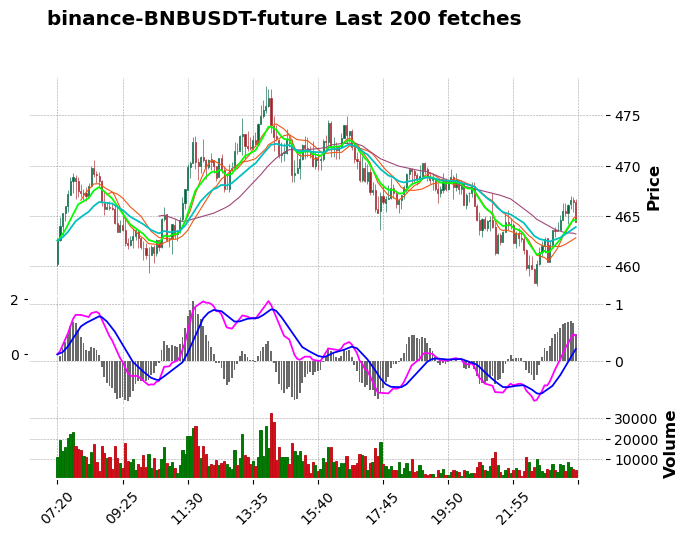

------------------------------------------------------------------------------------


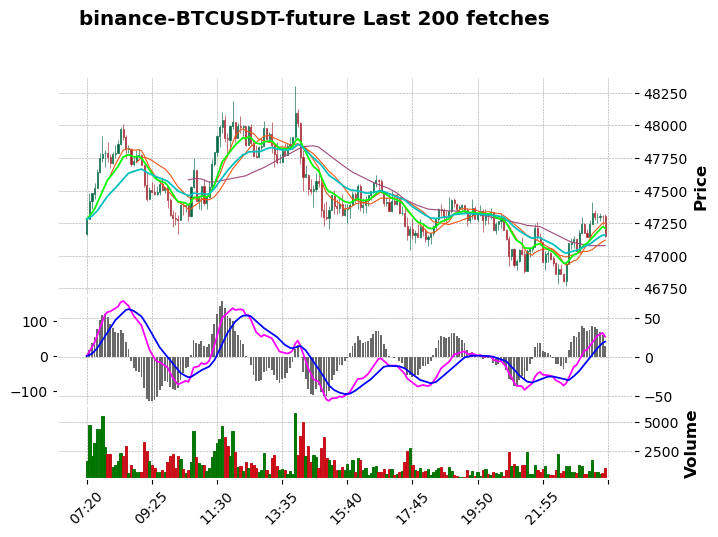

------------------------------------------------------------------------------------


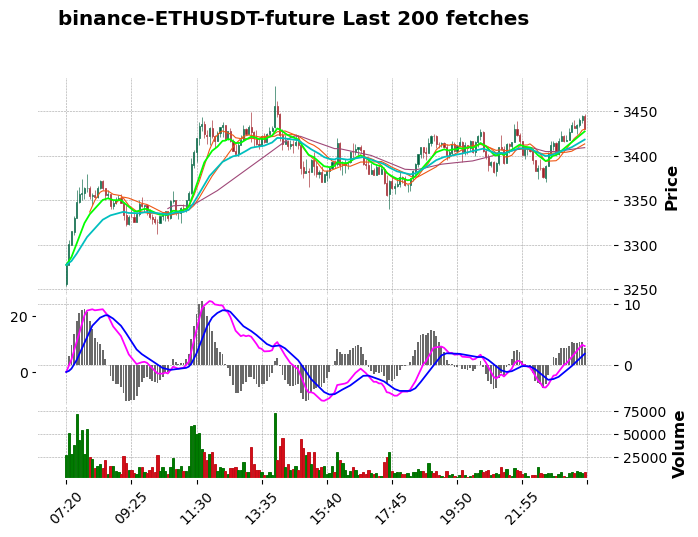

------------------------------------------------------------------------------------


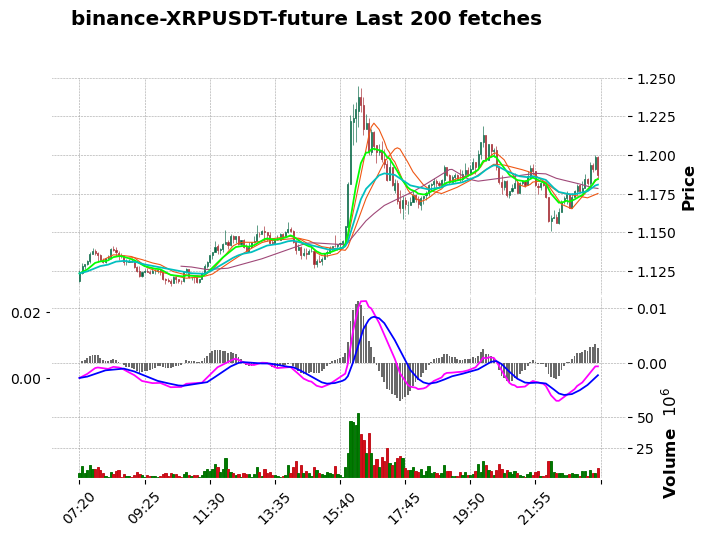

------------------------------------------------------------------------------------


In [36]:
# Candlestick of the 200 last data points with MACD

for key, value in candles.items():
    # print(key)
    # print(value.describe())
    num_datapoint = 200
    df = value.tail(num_datapoint)
    
    # calculate MACD (credit to mplfinance)
    exp12 = df['Close'].ewm(span=12, adjust=False).mean()
    exp26 = df['Close'].ewm(span=26, adjust=False).mean()
    macd = exp12 - exp26
    
    signal    = macd.ewm(span=9, adjust=False).mean()
    histogram = macd - signal

    apds = [mpf.make_addplot(exp12,color='lime'),
        mpf.make_addplot(exp26,color='c'),
        mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
                         color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
        mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
       ]


    mpf.plot(df, 
             style='charles',
             type='candle',
             volume=True,
             title=key+' Last 200 fetches',
             mav=(int(num_datapoint*0.05),int(num_datapoint*0.1),int(num_datapoint*0.2)),
             warn_too_much_data=32000,
             volume_panel=2,panel_ratios=(6,3,2),addplot=apds
            )
    print("------------------------------------------------------------------------------------")

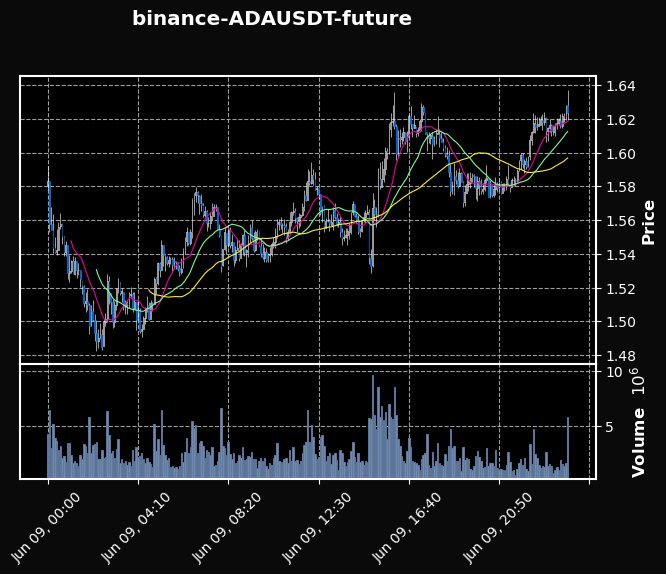

------------------------------------------------------------------------------------


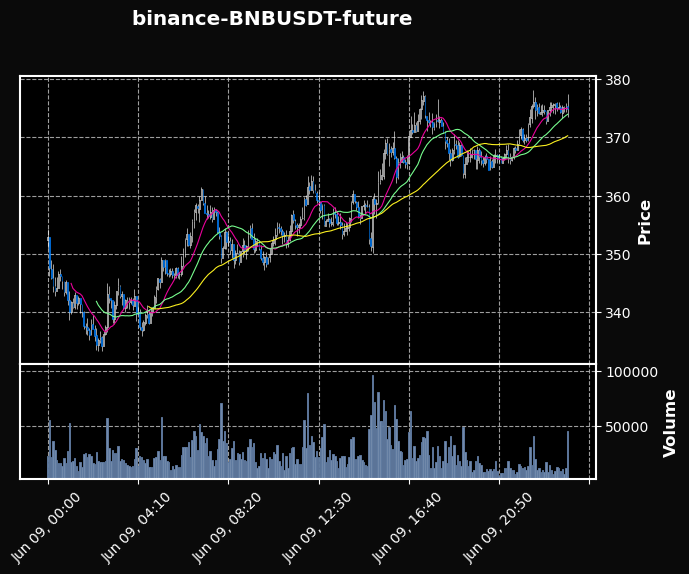

------------------------------------------------------------------------------------


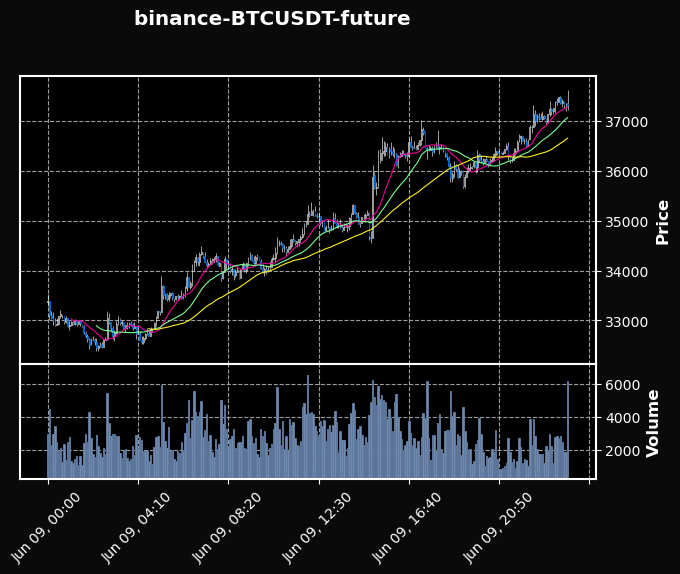

------------------------------------------------------------------------------------


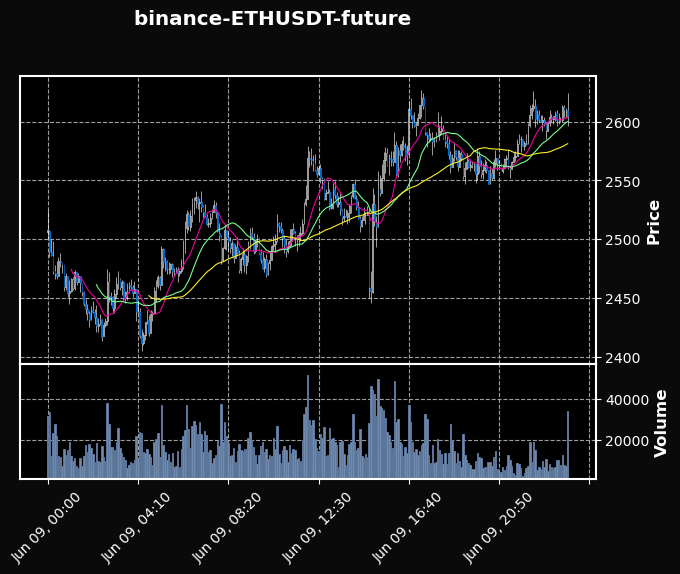

------------------------------------------------------------------------------------


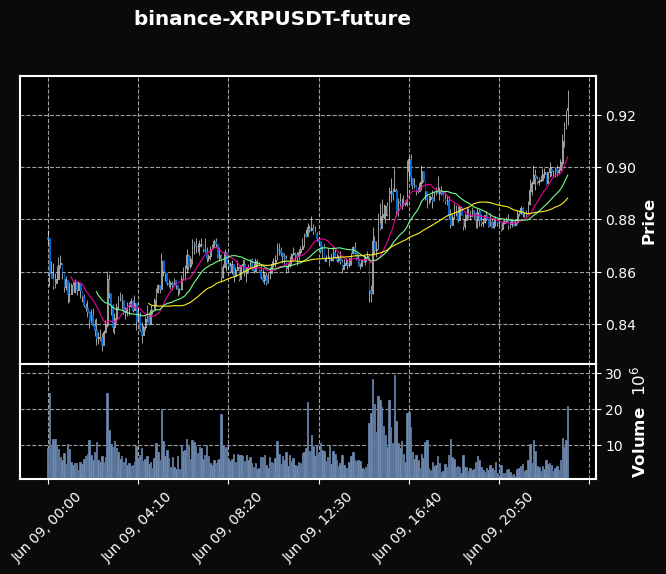

------------------------------------------------------------------------------------


In [30]:
# candlesticks on an arbitrary day. 

for key, value in candles.items():
    # print(key)
    # print(value.describe())
    period_of_interest = value.datetime.between("2021-06-09 00:00:00", "2021-06-10 00:00:00")
    num_datapoint = len(value[period_of_interest])

    mpf.plot(value[period_of_interest], 
             style='mike', # dark background, works best with dark jupyter theme!
             type='candle',
             volume=True,
             title=key+' ',
             mav=(int(num_datapoint*0.05),int(num_datapoint*0.1),int(num_datapoint*0.2)),
             warn_too_much_data=32000)
    print("------------------------------------------------------------------------------------")

# Some observations

### 1. Moving Averages

- a simple moving average (SMA) is used in the graphs. 
- given a appropriately chosen period (eg. ~<10% of datapoints here), a moving average can signal upwards/downwards trends.

- SMA predicts better in long term trends (they are closer to actual line in the first batch of graphs) than short-term plots

- When you see candlesticks below SMA line, it's most likely going downwards for a period of time, until it rises above the line, then it may starts an upward trend again. It is like a dynamic "support & resistance".

### 2. Multiple moving averages

- when multiple moving avergae lines (say 2: short-term and long-term) are deployed, we can look for points when two lines cross.
- "Golden cross" and "death cross" applies here.

- when ST line comes above LT line, it's a bullish trend - Golden Cross & buy
- when LT line comes above ST line, it's a bearish trend - Death Cross & sell

### 3. Inter-dependence

- performances of different crypto assets are highly dependent on each other. 

- Market usually goes up/ down together for all assets. Similar upwards/downwards trend can be generally observed. (see the 3rd batch of graphs) 